In [ ]:
%pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install nltk
%matplotlib inline

In [ ]:
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Box

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from gensim import corpora, models
from pprint import pprint

In [ ]:
import nltk
#nltk.download()

import pandas as pd
from pandas.core.arrays.sparse import dtype
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import string
import re

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

In [ ]:
pre = pd.read_csv("depression_pre.csv")
post = pd.read_csv("depression_post.csv")

Text(0.5, 0, 'Pre-COVID Total Comments Distribution')

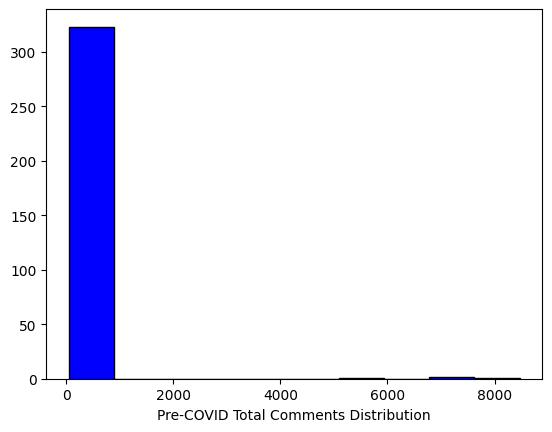

In [ ]:
plt.hist(pre['Total Comments'], color='blue', edgecolor='black')
plt.xlabel('Pre-COVID Total Comments Distribution')

Text(0.5, 0, 'Post COVID Upvote Ratio Distribution')

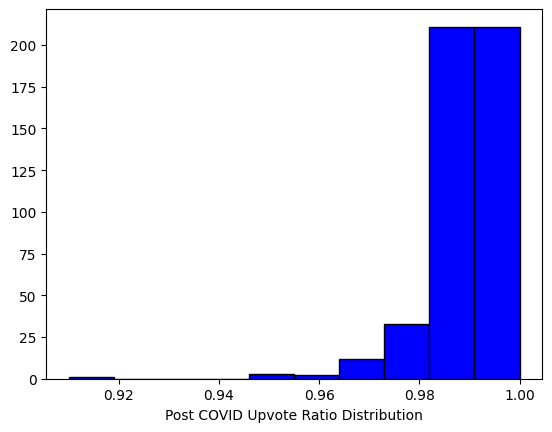

In [ ]:
plt.hist(post['Upvote Ratio'], color='blue', edgecolor='black')
plt.xlabel('Post COVID Upvote Ratio Distribution')

Text(0.5, 0, 'Pre COVID Total Comments Distribution')

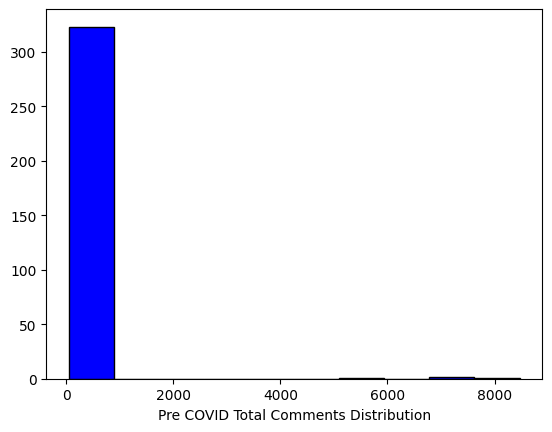

In [ ]:
plt.hist(pre['Total Comments'], color='blue', edgecolor='black')
plt.xlabel('Pre COVID Total Comments Distribution')

Text(0.5, 0, 'Post COVID Total Comments Distribution')

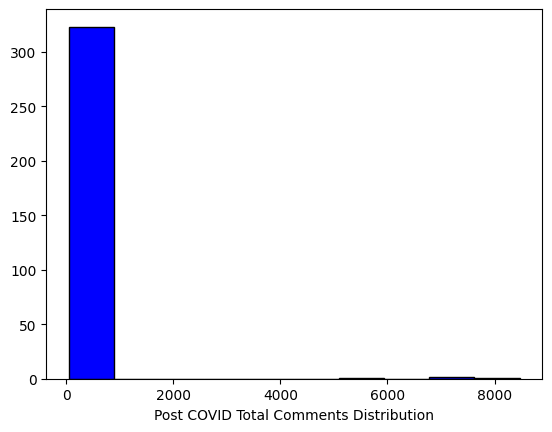

In [ ]:
plt.hist(pre['Total Comments'], color='blue', edgecolor='black')
plt.xlabel('Post COVID Total Comments Distribution')

Text(0.5, 0, 'Pre COVID Month Distribution')

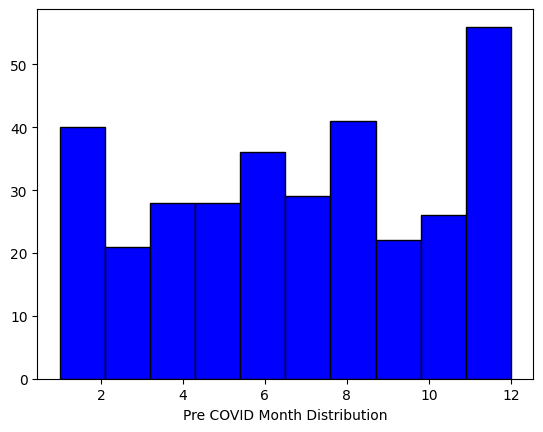

In [ ]:
plt.hist(pre['month'], color='blue', edgecolor='black')
plt.xlabel('Pre COVID Month Distribution')

Text(0.5, 0, 'Post COVID Month Distribution')

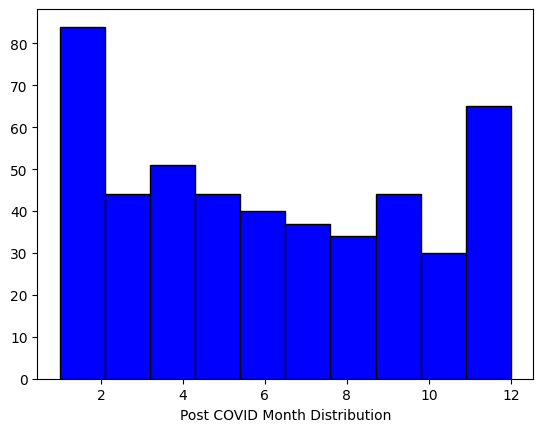

In [ ]:
plt.hist(post['month'], color='blue', edgecolor='black')
plt.xlabel('Post COVID Month Distribution')

Text(0.5, 0, 'Pre COVID year-month Distribution')

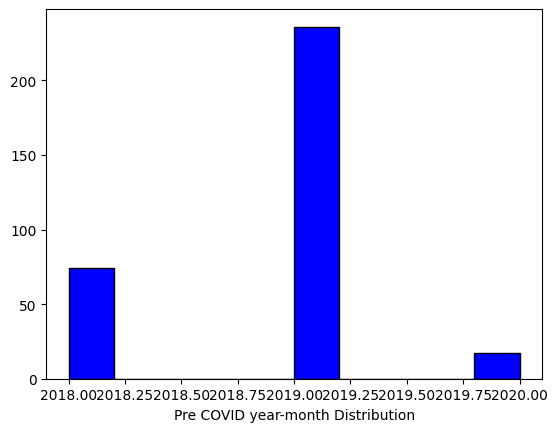

In [ ]:
plt.hist(pre['year'], color='blue', edgecolor='black')
plt.xlabel('Pre COVID year-month Distribution')

Text(0.5, 0, 'Post COVID year-month Distribution')

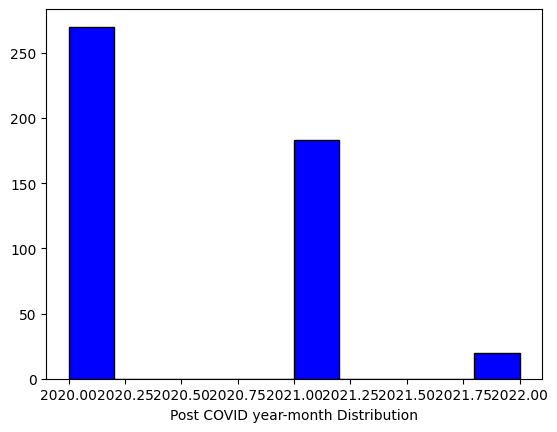

In [ ]:
plt.hist(post['year'], color='blue', edgecolor='black')
plt.xlabel('Post COVID year-month Distribution')

In [ ]:
pre["Post Text"].replace('[removed]', "", inplace = True)
post["Post Text"].replace('[deleted]', "", inplace = True)

In [ ]:
# post length mean

In [ ]:
pre_len = pre['Post Text'].str.len()

In [ ]:
pre_len.mean()

594.3757763975156

In [ ]:
pre_len.median()

349.0

In [ ]:
pre_len.mode()

0     59.0
1    197.0
2    300.0
3    596.0
4    800.0
Name: Post Text, dtype: float64

In [ ]:
post_len = post['Post Text'].str.len()
post_len.mean()

633.6880530973451

In [ ]:
post_len.median()

505.0

In [ ]:
post_len.mode()

0     57.0
1    150.0
2    200.0
3    305.0
4    537.0
Name: Post Text, dtype: float64

In [ ]:
pre_lda = pre[["Post Text"]]
post_lda = post[["Post Text"]]

In [ ]:
pre_lda['Post Text'] = pre_lda['Post Text'].values
post_lda['Post Text'] = post_lda['Post Text'].values

<ipython-input-11-641375fedd70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_lda['Post Text'] = pre_lda['Post Text'].values
<ipython-input-11-641375fedd70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_lda['Post Text'] = post_lda['Post Text'].values


In [ ]:
pre_lda = pre_lda.dropna()
pre_lda = pre_lda.reset_index(drop=True)

In [ ]:
post_lda = post_lda.dropna()
post_lda = post_lda.reset_index(drop=True)

In [ ]:
pre_doc = pre_lda
pre_doc

Post Text
0    it's stupid, but i always doubt the fact i hav...
1    My parents keep asking me this question.\nToda...
2    - be me\n- have chronic depression and social ...
3    That's all I want. I wanna go to a park, lay o...
4    And I scored in the 'severe' range. This lead ...
..                                                 ...
317  Seriously- I can’t tell even if I’ve known the...
318  I’m beginning to wonder if I have a medical co...
319  I fucking hate it so much. People around me, j...
320  I’m lying in bed exhausted. Tried to do homewo...
321  Welcome to /r/depression's check-in post - a p...

[322 rows x 1 columns]

In [ ]:
post_doc = post_lda
post_doc

Post Text
0    Basically what the title says and my current s...
1    I'm never going to get better why the fuck sho...
2    My only social interaction is at work but it's...
3    its like when you are playing videogame and yo...
4    I wonder how much longer I can continue like this
..                                                 ...
462  Nobody’s life is perfect of course but fuck. H...
463  Just because I look okay doesn’t mean I’m not ...
464  Anyone else, instead of sleeping more when dep...
465  There are so many people in the world who want...
466  So tired all the time. No motivation to get up...

[467 rows x 1 columns]

In [ ]:
post_doc['len of sentence'] = [len(sentence.split(' ')) for sentence in post_doc['Post Text']]

In [ ]:
print('No. of Sentence with 1 word :' , len(post_doc[post_doc['len of sentence'] == 1]))
print('Longest Sentence :' , post_doc['len of sentence'].max())

No. of Sentence with 1 word : 0
Longest Sentence : 5751


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
cvec = CountVectorizer(ngram_range=(1,3))
cvec.fit(post_doc['Post Text'])
main = cvec.transform(post_doc['Post Text'])



In [ ]:
df_main_vocab = pd.DataFrame(main.todense(),
                             columns = cvec.get_feature_names_out())


print(f'DF Shape for Main Vocab :' , df_main_vocab.shape)

DF Shape for Main Vocab : (452, 77697)


Text(0.5, 1.0, 'Trending Words in All Subreddit Post')

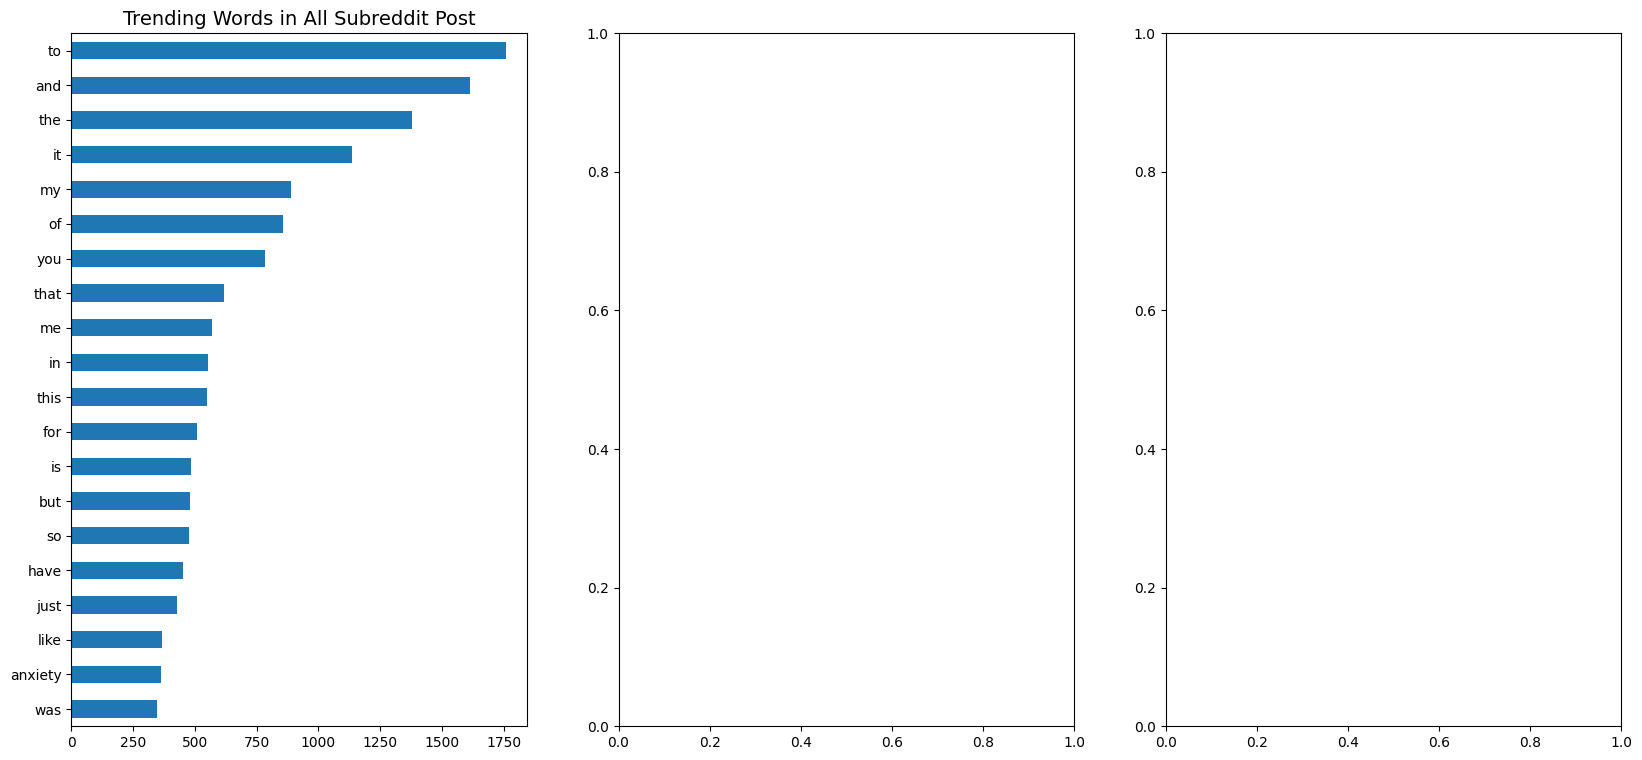

In [ ]:
fig , ax = plt.subplots(1 , 3 , figsize = (20,9))

df_main_vocab.sum().sort_values(ascending = True)[-20:].plot(kind = 'barh' , ax = ax[0])
ax[0].set_title('Trending Words in All Subreddit Post' , fontsize = 14)

In [ ]:
post_doc

Post Text  len of sentence
0    Basically what the title says and my current s...                9
1    I'm never going to get better why the fuck sho...               13
2    My only social interaction is at work but it's...               52
3    its like when you are playing videogame and yo...               29
4    I wonder how much longer I can continue like this               10
..                                                 ...              ...
462  Nobody’s life is perfect of course but fuck. H...               58
463  Just because I look okay doesn’t mean I’m not ...               12
464  Anyone else, instead of sleeping more when dep...               44
465  There are so many people in the world who want...               42
466  So tired all the time. No motivation to get up...               24

[467 rows x 2 columns]

NameError: ignored

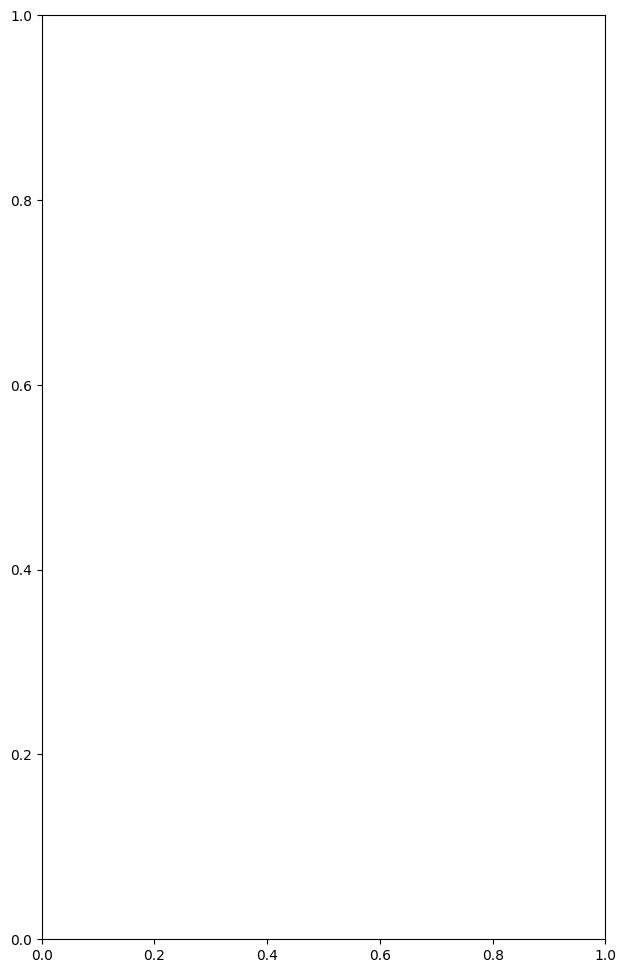

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title('Fake News' , fontsize = 16)

<Axes: >

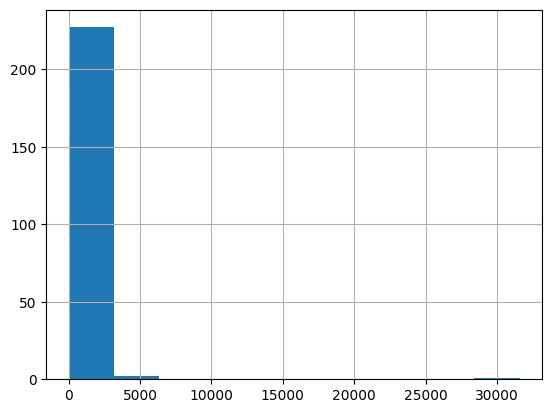

In [ ]:
pre_doc['Post Text'].str.len().hist()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129303 (\N{HUGGING FACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fun

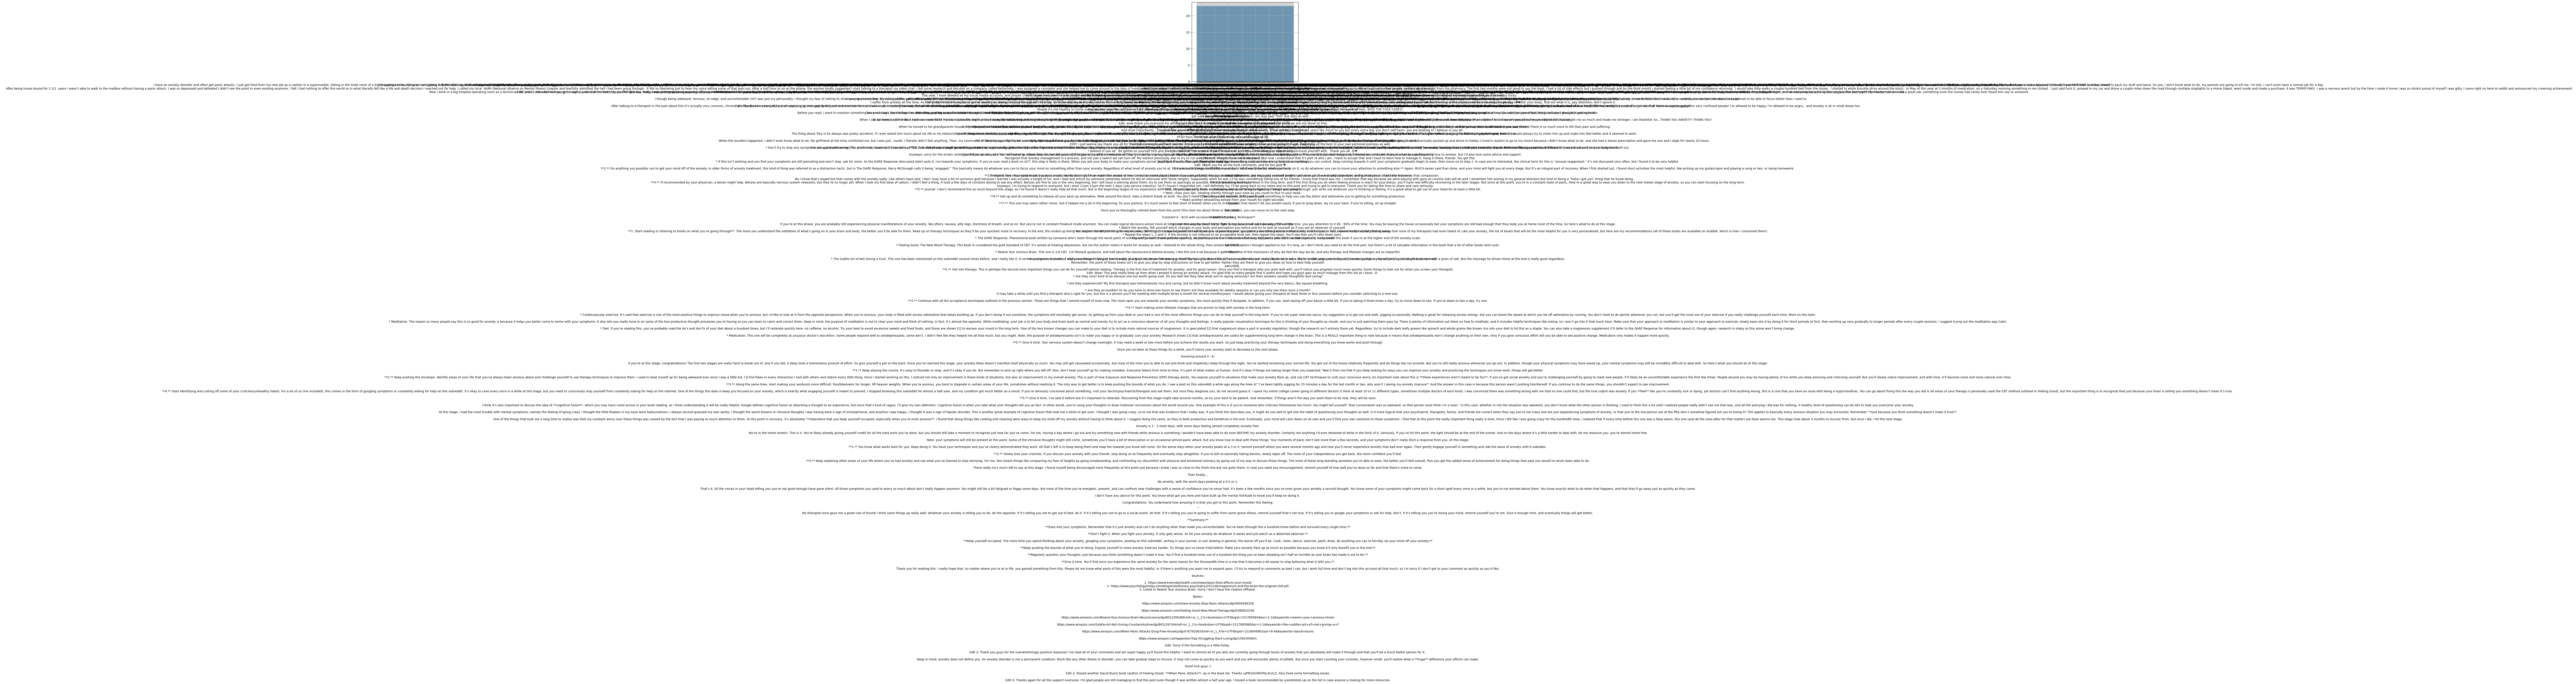

In [ ]:
pre['Post Text'].hist()

<Axes: >

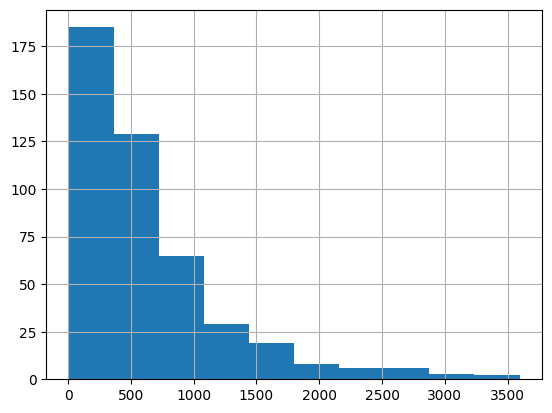

In [ ]:
post_doc['Post Text'].str.len().hist()

In [ ]:
post_doc['Post Text'].str.len()

0       55
1       61
2      294
3      157
4       49
      ... 
462    311
463     63
464    242
465    207
466    115
Name: Post Text, Length: 467, dtype: int64

In [ ]:
pre.corr(method ='pearson')

<ipython-input-25-f012b9eb7ade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre.corr(method ='pearson')


Unnamed: 0     Score  Upvote Ratio  Total Comments  \
Unnamed: 0          1.000000 -0.501725     -0.140180       -0.008160   
Score              -0.501725  1.000000      0.164757       -0.008467   
Upvote Ratio       -0.140180  0.164757      1.000000        0.107750   
Total Comments     -0.008160 -0.008467      0.107750        1.000000   
Original Content         NaN       NaN           NaN             NaN   
Saved                    NaN       NaN           NaN             NaN   
year                0.351478  0.188229     -0.010898        0.030079   
month               0.165177  0.055295      0.003997       -0.035092   

                  Original Content  Saved      year     month  
Unnamed: 0                     NaN    NaN  0.351478  0.165177  
Score                          NaN    NaN  0.188229  0.055295  
Upvote Ratio                   NaN    NaN -0.010898  0.003997  
Total Comments                 NaN    NaN  0.030079 -0.035092  
Original Content               NaN    NaN       NaN       NaN  
Saved                          NaN    NaN       NaN       NaN  
year                           NaN    NaN  1.000000 -0.065754  
month                          NaN    NaN -0.065754  1.000000

In [ ]:
pre['Post Length'] = pre['Post Text'].str.len()
pre.head()

Unnamed: 0                                              Title  \
0           0      Anyone else feel like their "fake depressed"?   
1           1                          Why don't you talk to us?   
2           2  An old man killed my only way of coping with d...   
3           3  Anyone just want to take a break from life and...   
4           4  I had to fill out one of those depression test...   

                                           Post Text      ID  Score  \
0  it's stupid, but i always doubt the fact i hav...  7tk5tf   2196   
1  My parents keep asking me this question.\nToda...  7rrkf1   1660   
2  - be me\n- have chronic depression and social ...  7t7c0h   1641   
3  That's all I want. I wanna go to a park, lay o...  7qwvjs   1402   
4  And I scored in the 'severe' range. This lead ...  7oydlq   1299   

   Upvote Ratio  Total Comments           Created On  \
0          0.99             156  2018-01-28 13:12:11   
1          0.99             136  2018-01-20 17:05:18   
2          0.98             107  2018-01-26 20:18:05   
3          0.99             104  2018-01-17 00:06:20   
4          0.99              96  2018-01-08 13:05:09   

                                            Post URL  Original Content  Saved  \
0  https://www.reddit.com/r/depression/comments/7...             False  False   
1  https://www.reddit.com/r/depression/comments/7...             False  False   
2  https://www.reddit.com/r/depression/comments/7...             False  False   
3  https://www.reddit.com/r/depression/comments/7...             False  False   
4  https://www.reddit.com/r/depression/comments/7...             False  False   

   year  month  Post Length  
0  2018      1        621.0  
1  2018      1        537.0  
2  2018      1        826.0  
3  2018      1        163.0  
4  2018      1        331.0

In [ ]:
pre2 = pre.drop(columns=['Unnamed: 0', 'Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID', 'Post Text', 'year', 'month'])
pre2

Score  Upvote Ratio  Total Comments  Post Length
0     2196          0.99             156        621.0
1     1660          0.99             136        537.0
2     1641          0.98             107        826.0
3     1402          0.99             104        163.0
4     1299          0.99              96        331.0
..     ...           ...             ...          ...
322   1410          1.00              74        190.0
323   1249          1.00             103        243.0
324   1224          0.99             121       1197.0
325   1154          1.00              83        800.0
326   1070          1.00            5220        650.0

[327 rows x 4 columns]

In [ ]:
log_pre = pre2.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
log_pre

Score  Upvote Ratio  Total Comments  Post Length
0    3.341632     -0.004365        2.193125     2.793092
1    3.220108     -0.004365        2.133539     2.729974
2    3.215109     -0.008774        2.029384     2.916980
3    3.146748     -0.004365        2.017033     2.212188
4    3.113609     -0.004365        1.982271     2.519828
..        ...           ...             ...          ...
322  3.149219      0.000000        1.869232     2.278754
323  3.096562      0.000000        2.012837     2.385606
324  3.087781     -0.004365        2.082785     3.078094
325  3.062206      0.000000        1.919078     2.903090
326  3.029384      0.000000        3.717671     2.812913

[327 rows x 4 columns]

<Axes: >

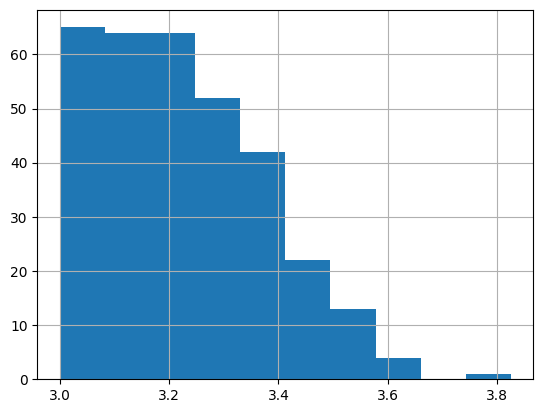

In [ ]:
log_pre['Score'].hist()

<Axes: >

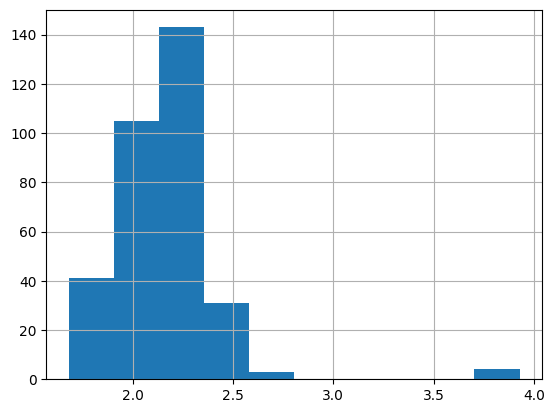

In [ ]:
log_pre['Total Comments'].hist()

<Axes: >

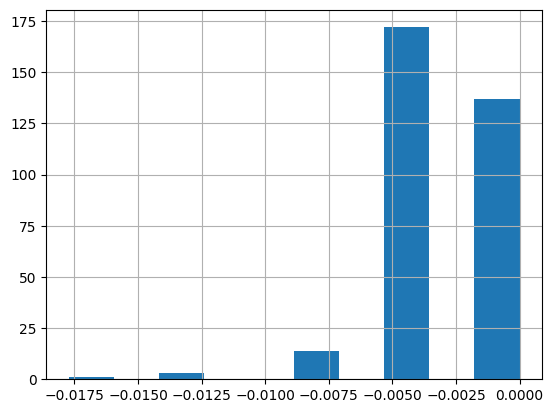

In [ ]:
log_pre['Upvote Ratio'].hist()

<Axes: >

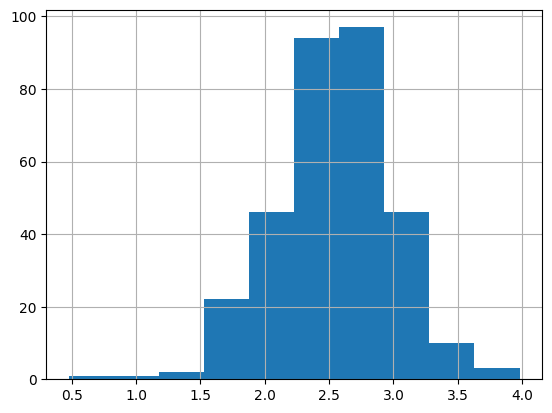

In [ ]:
log_pre['Post Length'].hist()

In [ ]:
log_pre.corr(method ='pearson')

Score  Upvote Ratio  Total Comments  Post Length
Score           1.000000      0.148294        0.312507    -0.133631
Upvote Ratio    0.148294      1.000000        0.046071    -0.103631
Total Comments  0.312507      0.046071        1.000000     0.077791
Post Length    -0.133631     -0.103631        0.077791     1.000000

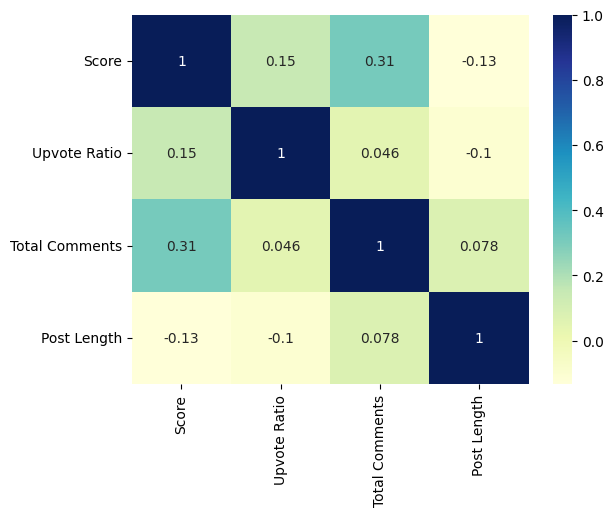

In [ ]:
import matplotlib.pyplot as mp

dataplot = sns.heatmap(log_pre.corr(method ='pearson'), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

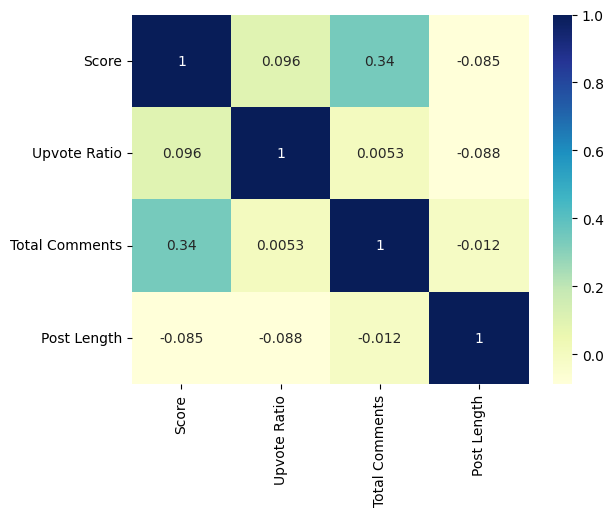

In [ ]:
import matplotlib.pyplot as mp

dataplot = sns.heatmap(pre2.corr(method ='kendall'), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
post['Post Length'] = post['Post Text'].str.len()
post.head()

Unnamed: 0                                              Title  \
0           0  The scary part about having depression is when...   
1           1  My therapist finally convinced me to start get...   
2           2  Does anyone else find it increasingly hard to ...   
3           3  the worst thing about depression,is seeing eve...   
4           4  I don’t live for myself anymore, I only live s...   

                                           Post Text      ID  Score  \
0  Basically what the title says and my current s...  f791jw   3755   
1  I'm never going to get better why the fuck sho...  fjthj0   3077   
2  My only social interaction is at work but it's...  fgnp3a   2820   
3  its like when you are playing videogame and yo...  f5zfvl   2781   
4  I wonder how much longer I can continue like this  f51oky   2655   

   Upvote Ratio  Total Comments           Created On  \
0          1.00             117  2020-02-21 10:06:06   
1          0.99             187  2020-03-16 22:09:44   
2          1.00             189  2020-03-10 23:51:30   
3          1.00             203  2020-02-18 21:48:03   
4          0.99             282  2020-02-17 02:32:55   

                                            Post URL  Original Content  Saved  \
0  https://www.reddit.com/r/depression/comments/f...             False  False   
1  https://www.reddit.com/r/depression/comments/f...             False  False   
2  https://www.reddit.com/r/depression/comments/f...             False  False   
3  https://www.reddit.com/r/depression/comments/f...             False  False   
4  https://www.reddit.com/r/depression/comments/f...             False  False   

   year  month  Post Length  
0  2020      2         55.0  
1  2020      3         61.0  
2  2020      3        294.0  
3  2020      2        157.0  
4  2020      2         49.0

In [ ]:
post2 = post.drop(columns=['Unnamed: 0', 'Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID', 'Post Text', 'year', 'month'])
post2

Score  Upvote Ratio  Total Comments  Post Length
0     3755          1.00             117         55.0
1     3077          0.99             187         61.0
2     2820          1.00             189        294.0
3     2781          1.00             203        157.0
4     2655          0.99             282         49.0
..     ...           ...             ...          ...
468   1784          1.00             286        311.0
469   1338          1.00              58         63.0
470   1211          1.00             125        242.0
471   1159          1.00              58        207.0
472   1143          1.00              98        115.0

[473 rows x 4 columns]

In [ ]:
log_post = post2.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
log_post

Score  Upvote Ratio  Total Comments  Post Length
0    3.574610      0.000000        2.068186     1.740363
1    3.488127     -0.004365        2.271842     1.785330
2    3.450249      0.000000        2.276462     2.468347
3    3.444201      0.000000        2.307496     2.195900
4    3.424065     -0.004365        2.450249     1.690196
..        ...           ...             ...          ...
468  3.251395      0.000000        2.456366     2.492760
469  3.126456      0.000000        1.763428     1.799341
470  3.083144      0.000000        2.096910     2.383815
471  3.064083      0.000000        1.763428     2.315970
472  3.058046      0.000000        1.991226     2.060698

[473 rows x 4 columns]

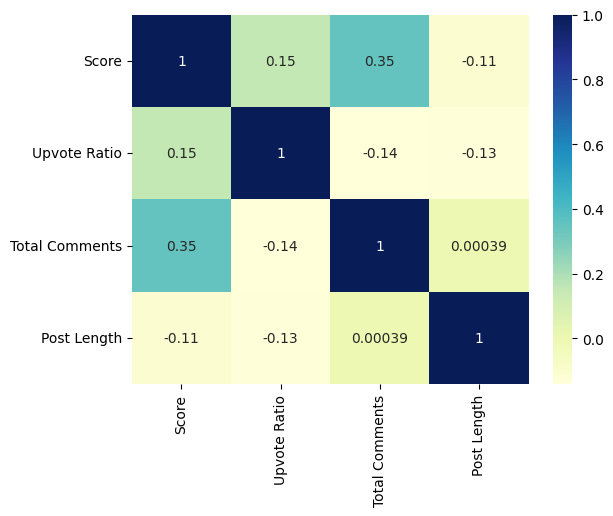

In [ ]:
dataplot = sns.heatmap(log_post.corr(method ='pearson'), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()